Here are my notes and assumptions:

1.'more than' -- one-sided mann whitney u test

2.'rated differently' -- consider both two-sided mann whitney u test & ks test

3.'ratings distribution' -- ks test

4.With the exception of question 9 & 10, we adopt element-wise removal of null values, as the proportion of missing data is relatively high.

5.Regarding the questions pertaining to ‘proportion,’ we conduct a separate test for each movie. However, a potential enhancement could be the implementation of a correction, such as FDR, to mitigate the likelihood of false discoveries and reduce the proportion of erroneous findings.

In [356]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd

In [357]:
df = pd.read_csv('movieReplicationSet.csv')
movie = df.iloc[:,:400]
sensation_seeking_behavior = df.iloc[:,400:421]
personality = df.iloc[:,421:464]
movie_experience = df.iloc[:,464:474]
person = df.iloc[:,474:]

1) Are movies that are more popular (operationalized as having more ratings) rated higher than movies that are less popular? [Hint: You can do a median-split of popularity to determine high vs. low popularity movies]

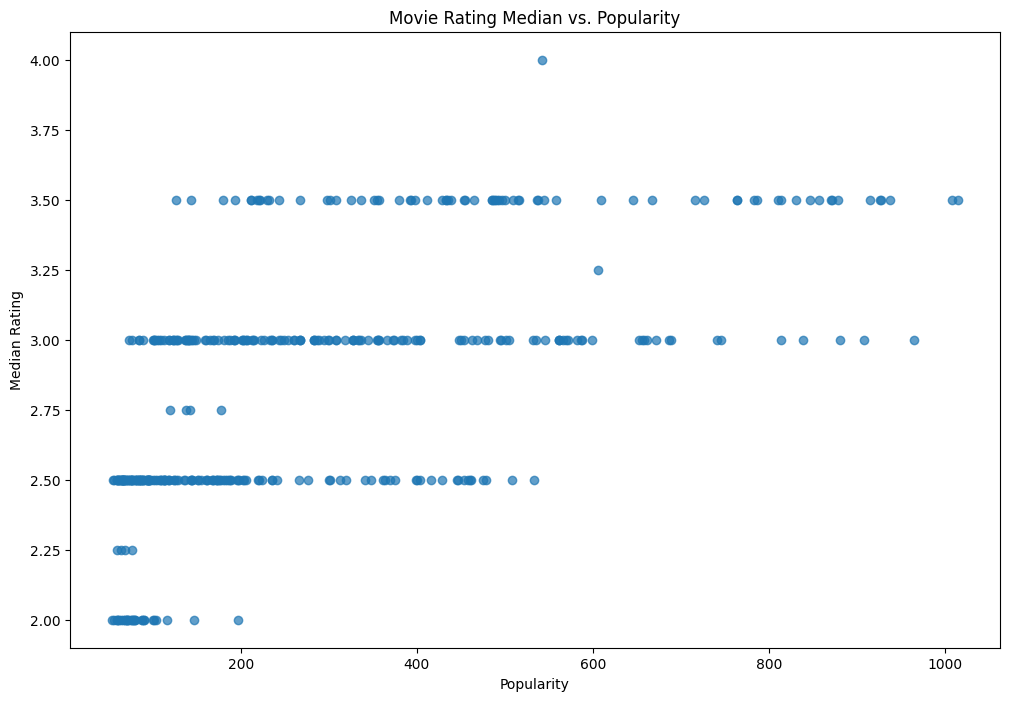

In [358]:
movie_stats = pd.DataFrame({
    'Popularity': movie.count(),
    'Median Rating': movie.median()
})

plt.figure(figsize=(12, 8))
plt.scatter(movie_stats['Popularity'], movie_stats['Median Rating'], alpha=0.7)
plt.title('Movie Rating Median vs. Popularity')
plt.xlabel('Popularity')
plt.ylabel('Median Rating')
plt.show()

In [359]:
median = movie.count().median()
list1 = (movie.count() >= median).to_list()
list2 = (movie.count() < median).to_list()
sample1 = movie.iloc[:,list1].stack().values
sample2 = movie.iloc[:,list2].stack().values

In [360]:
test_u = stats.mannwhitneyu(sample1,sample2, alternative='greater')
print('one-sided mann whitney u test:\n', 'p-value =', test_u.pvalue, test_u.pvalue <= 0.005)

one-sided mann whitney u test:
 p-value = 0.0 True


2) Are movies that are newer rated differently than movies that are older? [Hint: Do a median split of year of release to contrast movies in terms of whether they are old or new]

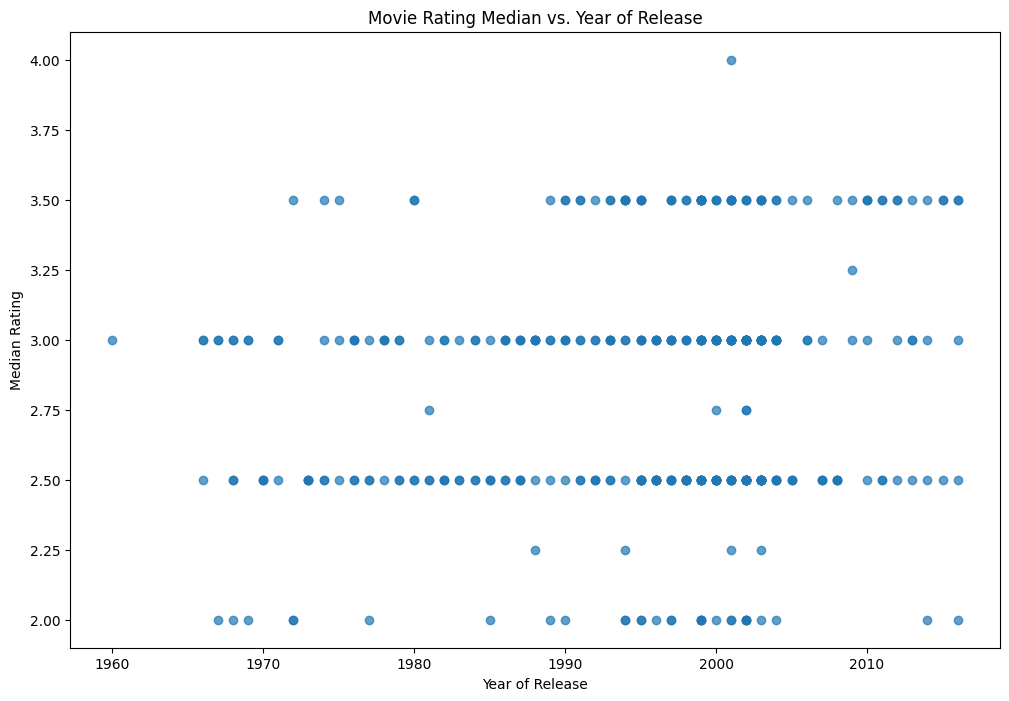

In [361]:
movie_stats = pd.DataFrame({
    'Year': [int(col[-5:-1]) for col in movie.columns],
    'Median Rating': movie.median()
})

plt.figure(figsize=(12, 8))
plt.scatter(movie_stats['Year'], movie_stats['Median Rating'], alpha=0.7)
plt.title('Movie Rating Median vs. Year of Release')
plt.xlabel('Year of Release')
plt.ylabel('Median Rating')
plt.show()

In [362]:
years = [int(col[-5:-1]) for col in movie.columns]
years = pd.Series(years)
median_year = pd.Series(years).median()
list1 = (years < median_year).to_list()
list2 = (years >= median_year).to_list()
sample1 = movie.iloc[:,list1].stack().values
sample2 = movie.iloc[:,list2].stack().values

In [363]:
test_u = stats.mannwhitneyu(sample1,sample2)
print('two-sided mann whitney u test:\n', 'p-value =', test_u.pvalue, test_u.pvalue <= 0.005)
test_ks = stats.kstest(sample1, sample2)
print('ks test:\n', 'p-value =',test_ks.pvalue, test_ks.pvalue <= 0.005)

two-sided mann whitney u test:
 p-value = 1.2849216001533934e-06 True
ks test:
 p-value = 0.002251935928322741 True


3) Is enjoyment of ‘Shrek (2001)’ gendered, i.e. do male and female viewers rate it differently?

In [364]:
sample1 = movie[person['Gender identity (1 = female; 2 = male; 3 = self-described)'] == 1]['Shrek (2001)'].dropna()
sample2 = movie[person['Gender identity (1 = female; 2 = male; 3 = self-described)'] == 2]['Shrek (2001)'].dropna()

In [365]:
test_u = stats.mannwhitneyu(sample1,sample2)
print('two-sided mann whitney u test:\n', 'p-value =', test_u.pvalue, test_u.pvalue <= 0.005)
test_ks = stats.kstest(sample1, sample2)
print('ks test:\n', 'p-value =',test_ks.pvalue, test_ks.pvalue <= 0.005)

two-sided mann whitney u test:
 p-value = 0.050536625925559 False
ks test:
 p-value = 0.05608204072286342 False


4) What proportion of movies are rated differently by male and female viewers?

In [366]:
num_movie = len(movie.columns)
num_movie_gender_diff_u = 0
num_movie_gender_diff_ks = 0
for col in movie.columns:
    sample1 = movie[person['Gender identity (1 = female; 2 = male; 3 = self-described)'] == 1][col].dropna()
    sample2 = movie[person['Gender identity (1 = female; 2 = male; 3 = self-described)'] == 2][col].dropna()
    test_u = stats.mannwhitneyu(sample1,sample2)
    if test_u.pvalue <= 0.005:
        num_movie_gender_diff_u += 1
    test_ks = stats.kstest(sample1, sample2)
    if test_ks.pvalue <= 0.005:
        num_movie_gender_diff_ks += 1

In [367]:
proportion_u = num_movie_gender_diff_u/num_movie
proportion_ks = num_movie_gender_diff_ks/num_movie
proportion_u, proportion_ks

(0.125, 0.0625)

5) Do people who are only children enjoy ‘The Lion King (1994)’ more than people with siblings?

In [368]:
sample1 = movie[person['Are you an only child? (1: Yes; 0: No; -1: Did not respond)'] == 1]['The Lion King (1994)'].dropna()
sample2 = movie[person['Are you an only child? (1: Yes; 0: No; -1: Did not respond)'] == 0]['The Lion King (1994)'].dropna()

In [369]:
test_u = stats.mannwhitneyu(sample1,sample2, alternative='greater')
print('one-sided mann whitney u test:\n', 'p-value =', test_u.pvalue, test_u.pvalue <= 0.005)

one-sided mann whitney u test:
 p-value = 0.978419092554931 False


6) What proportion of movies exhibit an “only child effect”, i.e. are rated different by viewers with siblings vs. those without?

In [370]:
num_movie = len(movie.columns)
num_movie_siblings_u = 0
num_movie_siblings_ks = 0
for col in movie.columns:
    sample1 = movie[person['Are you an only child? (1: Yes; 0: No; -1: Did not respond)'] == 1][col].dropna()
    sample2 = movie[person['Are you an only child? (1: Yes; 0: No; -1: Did not respond)'] == 0][col].dropna()
    test_u = stats.mannwhitneyu(sample1,sample2)
    if test_u.pvalue <= 0.005:
        num_movie_siblings_u += 1
    test_ks = stats.kstest(sample1, sample2)
    if test_ks.pvalue <= 0.005:
        num_movie_siblings_ks += 1

In [371]:
proportion_u = num_movie_siblings_u/num_movie
proportion_ks = num_movie_siblings_ks/num_movie
proportion_u, proportion_ks

(0.0175, 0.0075)

7) Do people who like to watch movies socially enjoy ‘The Wolf of Wall Street (2013)’ more than those who prefer to watch them alone?

In [372]:
sample1 = movie[person['Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)'] == 0]['The Wolf of Wall Street (2013)'].dropna()
sample2 = movie[person['Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)'] == 1]['The Wolf of Wall Street (2013)'].dropna()

In [373]:
test_u = stats.mannwhitneyu(sample1,sample2, alternative='greater')
print('one-sided mann whitney u test:\n', 'p-value =', test_u.pvalue, test_u.pvalue <= 0.005)

one-sided mann whitney u test:
 p-value = 0.9436657996253056 False


8) What proportion of movies exhibit such a “social watching” effect?

Here, assume the “social watching” effect refers to "people who like to watch movies socially enjoy them more than those who prefer to watch them alone", so I did the one-sided mann whitney u test.

In [374]:
num_movie = len(movie.columns)
num_movie_social_u = 0
for col in movie.columns:
    sample1 = movie[person['Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)'] == 0][col].dropna()
    sample2 = movie[person['Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)'] == 1][col].dropna()
    test_u = stats.mannwhitneyu(sample1,sample2,alternative='greater')
    if test_u.pvalue <= 0.005:
        num_movie_social_u += 1

In [375]:
proportion_u = num_movie_social_u/num_movie
proportion_u

0.015

9) Is the ratings distribution of ‘Home Alone (1990)’ different than that of ‘Finding Nemo (2003)’?

we employ row-wise removal of null values to mitigate a potential source of bias

In [376]:
sample1 = movie[['Home Alone (1990)', 'Finding Nemo (2003)']].dropna()['Home Alone (1990)']
sample2 = movie[['Home Alone (1990)', 'Finding Nemo (2003)']].dropna()['Finding Nemo (2003)']

In [377]:
test_ks = stats.kstest(sample1, sample2)
print('ks test:\n', 'p-value =',test_ks.pvalue, test_ks.pvalue <= 0.005)

ks test:
 p-value = 2.2038507937682687e-10 True


10) There are ratings on movies from several franchises ([‘Star Wars’, ‘Harry Potter’, ‘The Matrix’, ‘Indiana Jones’, ‘Jurassic Park’, ‘Pirates of the Caribbean’, ‘Toy Story’, ‘Batman’]) in this dataset. How many of these are of inconsistent quality, as experienced by viewers? [Hint: You can use the keywords in quotation marks featured in this question to identify the movies that are part of each franchise]

To appropriately assess the consistency of movie quality, we employ row-wise removal of null values to mitigate a potential source of bias.

In [378]:
for name in ['Star Wars', 'Harry Potter', 'The Matrix', 'Indiana Jones', 'Jurassic Park', 'Pirates of the Caribbean', 'Toy Story', 'Batman']:
    movie_list = [col for col in movie.columns if name in col]
    ratings = movie[movie_list].dropna()
    test_kruskal = stats.kruskal(*[ratings[col] for col in movie_list])
    print(f'For {name}, Kruskal-Wallis test:\n', 'p-value =',test_kruskal.pvalue, test_kruskal.pvalue <= 0.005)

For Star Wars, Kruskal-Wallis test:
 p-value = 6.940162236984522e-40 True
For Harry Potter, Kruskal-Wallis test:
 p-value = 0.11790622831256056 False
For The Matrix, Kruskal-Wallis test:
 p-value = 1.7537323830838066e-09 True
For Indiana Jones, Kruskal-Wallis test:
 p-value = 1.020118354785894e-11 True
For Jurassic Park, Kruskal-Wallis test:
 p-value = 1.8492328391686055e-11 True
For Pirates of the Caribbean, Kruskal-Wallis test:
 p-value = 0.035792727694248905 False
For Toy Story, Kruskal-Wallis test:
 p-value = 7.902234665149812e-06 True
For Batman, Kruskal-Wallis test:
 p-value = 4.138049902003417e-19 True


Tell us something interesting and true (supported by a significance test of some kind) about the movies in this dataset that is not already covered by the questions above [for 5% of the grade score].

On average, men tend to have a greater interest in watching movies compared to women.

In [379]:
movie[person['Gender identity (1 = female; 2 = male; 3 = self-described)'] == 1].stack().values

array([4. , 3. , 4. , ..., 4. , 3.5, 4. ])

In [380]:
sample1 = movie[person['Gender identity (1 = female; 2 = male; 3 = self-described)'] == 1].stack().groupby(level=0).count()
sample2 = movie[person['Gender identity (1 = female; 2 = male; 3 = self-described)'] == 2].stack().groupby(level=0).count()
print(sample1.mean(), sample2.mean())

95.12391573729863 126.47692307692307


In [381]:
test_ind_t = stats.ttest_ind(sample2, sample1, alternative='greater', equal_var=False)
print('one-sided welch test test:\n', 'p-value =',test_ind_t.pvalue, test_ind_t.pvalue <= 0.005)

one-sided welch test test:
 p-value = 1.3692919655897625e-07 True


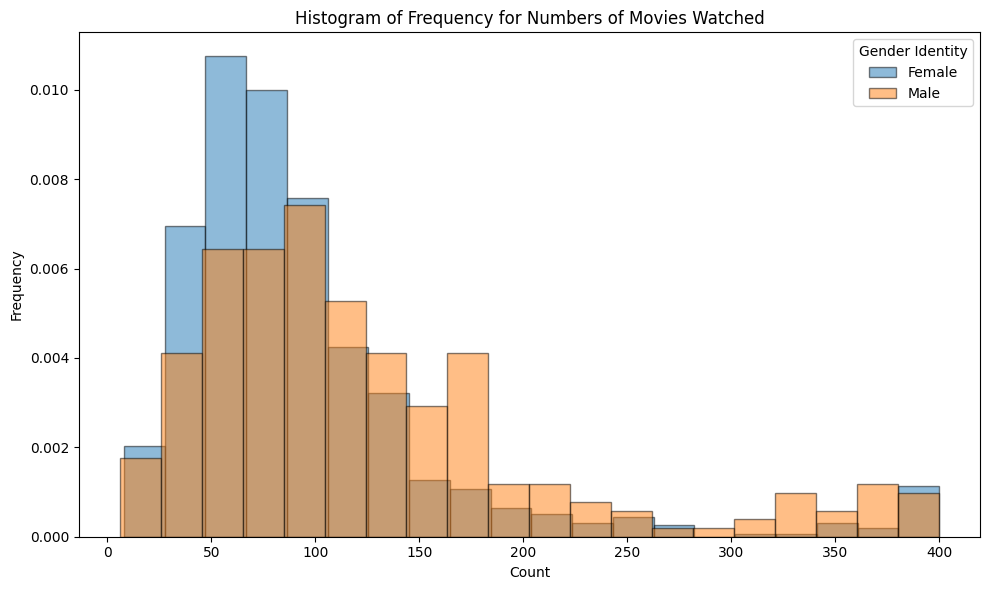

In [382]:
plt.figure(figsize=(10, 6))
plt.hist(sample1, bins=20, alpha=0.5, label='Female', density=True, edgecolor='black')
plt.hist(sample2, bins=20, alpha=0.5, label='Male', density=True, edgecolor='black')

plt.title('Histogram of Frequency for Numbers of Movies Watched')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.legend(title='Gender Identity')
plt.tight_layout()
plt.show()

In [383]:
person['Gender identity (1 = female; 2 = male; 3 = self-described)'].value_counts()

Gender identity (1 = female; 2 = male; 3 = self-described)
1.0    807
2.0    260
3.0      6
Name: count, dtype: int64